# Linear Regression - FBI:UCR Crime dataset

#### Build a regression model to predict property crimes.

In [30]:
# Import modules.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from IPython.display import display
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Display preferences.
%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.float_format = '{:.3f}'.format

# Suppress error.
import warnings
warnings.filterwarnings(action='ignore', module='scipy',
                       message='^internal gelsd')

In [31]:
# Load data.
df = pd.read_csv('~/src/data/unit2/nycrimedata.csv')
print(df.shape)
print(df.dtypes)
df.head()

(348, 13)
City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                 int64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [32]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


### Cleaning the data

In [33]:
df.columns = ['city', 'population', 'violent_crime', 'murder', 'rape_1',
              'rape_2', 'robbery', 'aggravated_assault', 'property_crime',
              'burglary', 'larceny_theft', 'motor_vehicle_theft', 'arson3']
df.tail()

,city,population,violent_crime,murder,rape_1,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
343,Woodbury Town,10685,3,0,nan,0,2,1,541,9,529,3,nan
344,Woodridge Village,829,7,0,nan,0,0,7,17,8,9,0,0.000
345,Woodstock Town,5931,2,0,nan,0,0,2,58,13,45,0,nan
346,Yonkers,199134,1036,6,nan,25,390,615,2368,470,1662,236,10.000
347,Yorktown Town,36643,15,0,nan,0,2,13,334,45,287,2,nan


In [34]:
df.isnull().sum()

city                     0
population               0
violent_crime            0
murder                   0
rape_1                 348
rape_2                   0
robbery                  0
aggravated_assault       0
property_crime           0
burglary                 0
larceny_theft            0
motor_vehicle_theft      0
arson3                 161
dtype: int64

In [35]:
df = df.drop(['rape_1'], axis=1)
df.tail()

,city,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
343,Woodbury Town,10685,3,0,0,2,1,541,9,529,3,nan
344,Woodridge Village,829,7,0,0,0,7,17,8,9,0,0.000
345,Woodstock Town,5931,2,0,0,0,2,58,13,45,0,nan
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236,10.000
347,Yorktown Town,36643,15,0,0,2,13,334,45,287,2,nan


In [36]:
df.fillna(0, inplace=True)
df.isnull().sum()
#df.tail()

city                   0
population             0
violent_crime          0
murder                 0
rape_2                 0
robbery                0
aggravated_assault     0
property_crime         0
burglary               0
larceny_theft          0
motor_vehicle_theft    0
arson3                 0
dtype: int64

### Exploring the dataset

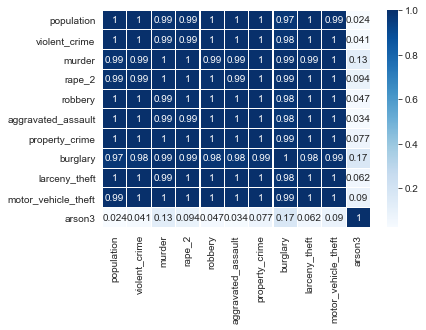

In [37]:
sns.heatmap(df.corr(), linewidths=.1, cmap='Blues', annot=True)

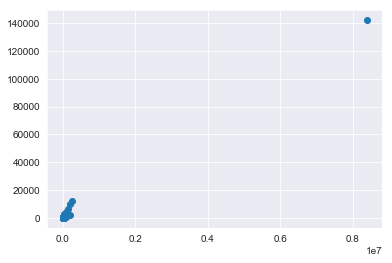

In [38]:
plt.scatter(x='population', y='property_crime', data=df)

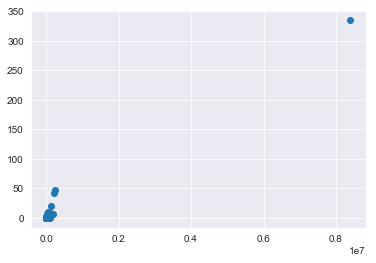

In [39]:
plt.scatter(x='population', y='murder', data=df)

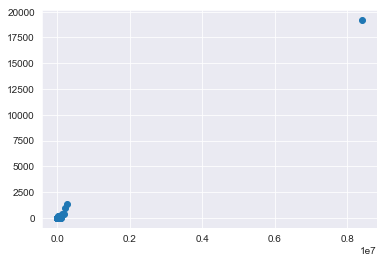

In [40]:
plt.scatter(x='population', y='robbery', data=df)

In [41]:
# Dropping the outlier
df = df.drop(df['population'].idxmax())
df.describe()

,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
count,347.000,347.000,347.000,347.000,347.000,347.000,347.000,347.000,347.000,347.000,347.000
mean,15956.686,51.213,0.605,2.677,17.867,30.063,385.752,72.173,298.994,14.585,1.009
std,27080.219,236.667,3.707,10.741,94.972,128.783,1034.369,264.941,715.232,67.682,7.896
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2997.000,2.000,0.000,0.000,0.000,1.000,40.000,6.000,31.000,0.000,0.000
50%,7187.000,6.000,0.000,0.000,1.000,4.000,112.000,17.000,94.000,2.000,0.000
75%,18160.500,21.500,0.000,2.000,5.000,14.000,340.500,51.000,284.500,7.000,0.000
max,258789.000,3249.000,47.000,145.000,1322.000,1735.000,12491.000,3458.000,8076.000,957.000,132.000


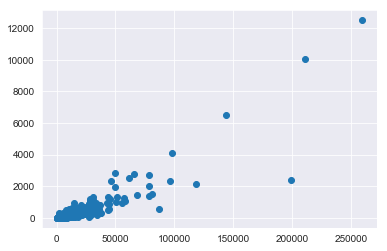

In [42]:
plt.scatter(x='population', y='property_crime', data=df)

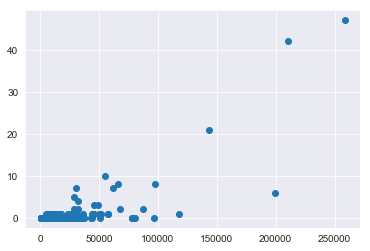

In [43]:
plt.scatter(x='population', y='murder', data=df)

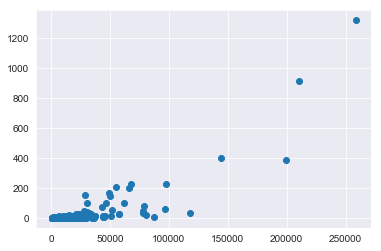

In [44]:
plt.scatter(x='population', y='robbery', data=df)

### Creating categorical features

In [45]:
df['population_squared'] = df['population']*df['population']
df.head()

,city,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,population_squared
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000,3463321
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000,6640929
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000,8099716
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0.000,9595377936
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0.000,40806544


In [46]:
df['violent_crime_cat'] = df['violent_crime'].apply(lambda x: 1 if x > 0 else 0)
df['murder_cat'] = df['murder'].apply(lambda x: 1 if x > 0 else 0)
df['robbery_cat'] = df['robbery'].apply(lambda x: 1 if x > 0 else 0)
df['burglary_cat'] = df['burglary'].apply(lambda x: 1 if x > 0 else 0)
df['larceny_cat'] = df['larceny_theft'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,city,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,population_squared,violent_crime_cat,murder_cat,robbery_cat,burglary_cat,larceny_cat
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000,3463321,0,0,0,1,1
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000,6640929,1,0,0,1,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000,8099716,1,0,0,1,1
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0.000,9595377936,1,1,1,1,1
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0.000,40806544,1,0,1,1,1


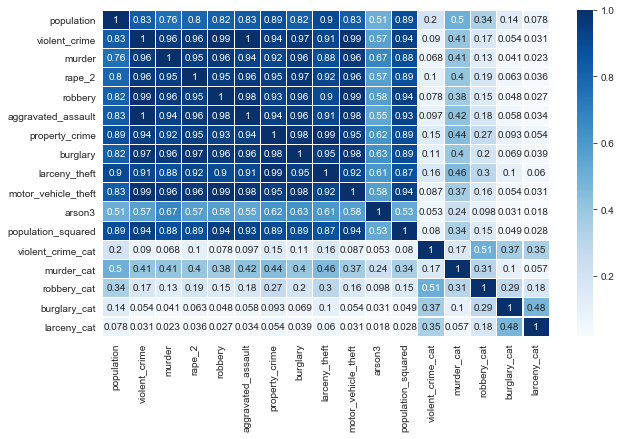

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), linewidths=.1, cmap='Blues', annot=True)
plt.show()

### Regression

In [48]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime'].values.reshape(-1, 1)
X = df[['population_squared', 'murder_cat', 'robbery_cat']]
regr.fit(X, Y)

# Inspect the results.
print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared \n', regr.score(X, Y))

Coefficients 
 [[1.70507593e-07 3.71055955e+02 2.13004398e+02]]
Intercept 
 [38.65134045]
R-squared 
 0.8282588218885816


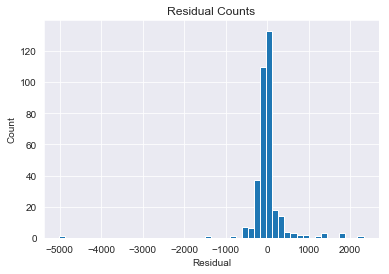

In [49]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual, bins=50)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

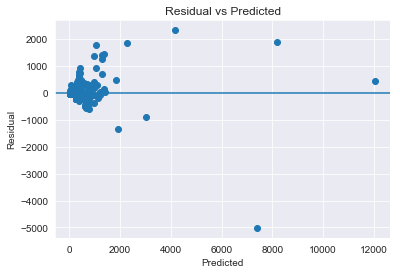

In [50]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs Predicted')
plt.show()

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


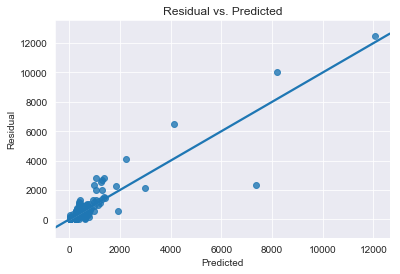

In [51]:
sns.regplot(predicted, actual, ci=False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs. Predicted')
plt.show()

In [52]:
correlation_matrix = X.corr()
display(correlation_matrix)

,population_squared,murder_cat,robbery_cat
population_squared,1.000,0.345,0.152
murder_cat,0.345,1.000,0.311
robbery_cat,0.152,0.311,1.000


In [53]:
# Model formula where '~' represents '=' in functional form.
linear_formula = 'property_crime ~ population_squared+murder_cat+robbery_cat'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

In [54]:
print('\ncoefficients: \n', lm.params)
print('\np-values: \n', lm.pvalues)
print('\nr-squared: \n', lm.rsquared)
print('\nConfidence Intervals: \n', lm.conf_int())
#print(lm.summary())


coefficients: 
 Intercept             38.651
population_squared     0.000
murder_cat           371.056
robbery_cat          213.004
dtype: float64

p-values: 
 Intercept            0.291
population_squared   0.000
murder_cat           0.000
robbery_cat          0.000
dtype: float64

r-squared: 
 0.8282588218885816

Confidence Intervals: 
                          0       1
Intercept          -33.181 110.484
population_squared   0.000   0.000
murder_cat         225.017 517.095
robbery_cat        115.284 310.725


# Validating the regression model with 2014 data

In [76]:
# Load data.
df_2014 = pd.read_csv('~/src/data/unit2/nycrimedata2014.csv')
print(df_2014.shape)
print(df_2014.dtypes)
df_2014.head()

(369, 13)
City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                           float64
Burglary                                    int64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851,0,0,nan,0.000,0,0,11.000,1,10.000,0,0.000
1,Addison Town and Village,2568,2,0,nan,0.000,1,1,49.000,1,47.000,1,0.000
2,Afton Village4,820,0,0,0.000,nan,0,0,1.000,0,1.000,0,0.000
3,Akron Village,2842,1,0,nan,0.000,0,1,17.000,0,17.000,0,0.000
4,Albany4,98595,802,8,54.000,nan,237,503,3888.000,683,3083.000,122,12.000


In [77]:
df_2014.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,369.000,369.000,369.000,227.000,142.000,369.000,369.000,368.000,369.000,368.000,369.000,365.000
mean,37814.824,183.691,1.453,15.555,0.007,60.661,112.005,698.361,100.900,562.791,34.317,1.425
std,441159.058,2638.842,17.694,146.261,0.084,866.481,1640.515,7123.614,855.103,5869.850,406.957,7.995
min,79.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2631.000,1.000,0.000,0.000,0.000,0.000,0.000,25.000,4.000,20.000,0.000,0.000
50%,6581.000,5.000,0.000,1.000,0.000,1.000,3.000,76.000,12.000,60.500,2.000,0.000
75%,15408.000,18.000,0.000,4.000,0.000,4.000,12.000,271.500,39.000,228.500,6.000,1.000
max,8473938.000,50564.000,333.000,2190.000,1.000,16581.000,31460.000,135747.000,15916.000,112107.000,7724.000,135.000


### Cleaning the data

In [78]:
df_2014.columns = ['city', 'population', 'violent_crime', 'murder', 'rape_2',
              'rape_2drop', 'robbery', 'aggravated_assault', 'property_crime',
              'burglary', 'larceny_theft', 'motor_vehicle_theft', 'arson3']
df_2014.tail()

,city,population,violent_crime,murder,rape_2,rape_2drop,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
364,"Woodbury Town4, 5",10739,4,0,0.000,nan,1,3,nan,5,nan,0,0.000
365,Woodstock Town4,5907,3,0,1.000,nan,2,0,43.000,14,29.000,0,0.000
366,Yonkers4,200624,974,3,33.000,nan,358,580,2009.000,414,1395.000,200,15.000
367,Yorktown Town4,36989,13,0,0.000,nan,0,13,209.000,24,182.000,3,0.000
368,Youngstown Village4,1896,0,0,0.000,nan,0,0,1.000,0,1.000,0,0.000


In [79]:
df_2014.isnull().sum()

city                     0
population               0
violent_crime            0
murder                   0
rape_2                 142
rape_2drop             227
robbery                  0
aggravated_assault       0
property_crime           1
burglary                 0
larceny_theft            1
motor_vehicle_theft      0
arson3                   4
dtype: int64

In [80]:
df_2014 = df_2014.drop(['rape_2drop'], axis=1)
df_2014.tail()

,city,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
364,"Woodbury Town4, 5",10739,4,0,0.000,1,3,nan,5,nan,0,0.000
365,Woodstock Town4,5907,3,0,1.000,2,0,43.000,14,29.000,0,0.000
366,Yonkers4,200624,974,3,33.000,358,580,2009.000,414,1395.000,200,15.000
367,Yorktown Town4,36989,13,0,0.000,0,13,209.000,24,182.000,3,0.000
368,Youngstown Village4,1896,0,0,0.000,0,0,1.000,0,1.000,0,0.000


In [81]:
df_2014.fillna(0, inplace=True)
df_2014.isnull().sum()
#df_2014.tail()

city                   0
population             0
violent_crime          0
murder                 0
rape_2                 0
robbery                0
aggravated_assault     0
property_crime         0
burglary               0
larceny_theft          0
motor_vehicle_theft    0
arson3                 0
dtype: int64

### Exploring the dataset

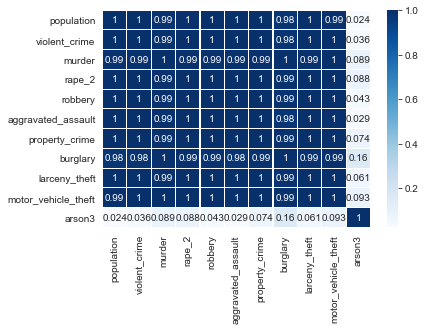

In [82]:
sns.heatmap(df_2014.corr(), linewidths=.1, cmap='Blues', annot=True)

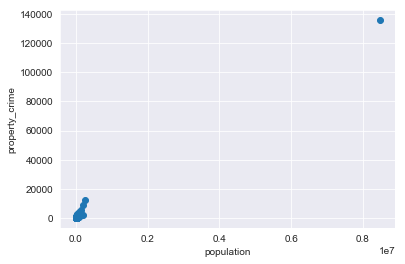

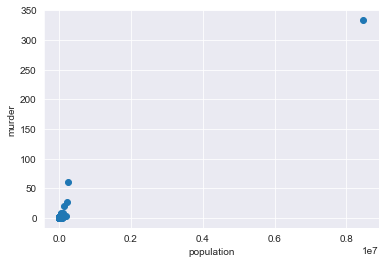

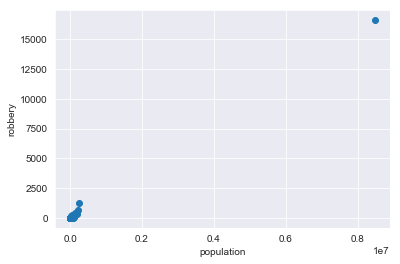

In [84]:
plt.scatter(x='population', y='property_crime', data=df_2014)
plt.xlabel('population')
plt.ylabel('property_crime')
plt.show()

plt.scatter(x='population', y='murder', data=df_2014)
plt.xlabel('population')
plt.ylabel('murder')
plt.show()

plt.scatter(x='population', y='robbery', data=df_2014)
plt.xlabel('population')
plt.ylabel('robbery')
plt.show()

In [85]:
# Dropping the outlier
df_2014 = df_2014.drop(df_2014['population'].idxmax())
df_2014.describe()

,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
count,368.000,368.000,368.000,368.000,368.000,368.000,368.000,368.000,368.000,368.000,368.000
mean,14890.576,46.788,0.552,3.644,15.769,26.821,329.484,57.924,258.152,13.421,1.413
std,26569.407,218.311,3.687,15.535,84.608,117.039,956.855,223.212,678.779,67.132,7.963
min,79.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2628.250,1.000,0.000,0.000,0.000,0.000,24.750,4.000,20.000,0.000,0.000
50%,6564.500,5.000,0.000,0.000,1.000,3.000,75.000,12.000,59.500,2.000,0.000
75%,15283.500,17.250,0.000,2.000,4.000,12.000,268.500,39.000,226.500,6.000,1.000
max,258419.000,3174.000,60.000,190.000,1277.000,1663.000,12449.000,3119.000,8362.000,968.000,135.000


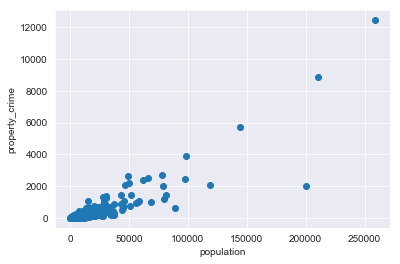

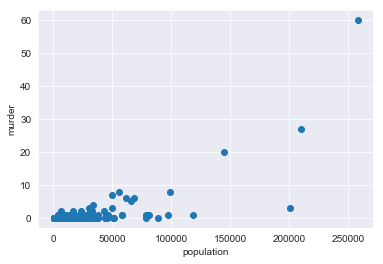

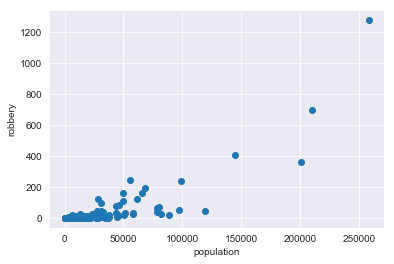

In [86]:
plt.scatter(x='population', y='property_crime', data=df_2014)
plt.xlabel('population')
plt.ylabel('property_crime')
plt.show()

plt.scatter(x='population', y='murder', data=df_2014)
plt.xlabel('population')
plt.ylabel('murder')
plt.show()

plt.scatter(x='population', y='robbery', data=df_2014)
plt.xlabel('population')
plt.ylabel('robbery')
plt.show()

### Creating categorical features

In [87]:
df_2014['population_squared'] = df_2014['population']*df_2014['population']
df_2014.head()

,city,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,population_squared
0,Adams Village,1851,0,0,0.000,0,0,11.000,1,10.000,0,0.000,3426201
1,Addison Town and Village,2568,2,0,0.000,1,1,49.000,1,47.000,1,0.000,6594624
2,Afton Village4,820,0,0,0.000,0,0,1.000,0,1.000,0,0.000,672400
3,Akron Village,2842,1,0,0.000,0,1,17.000,0,17.000,0,0.000,8076964
4,Albany4,98595,802,8,54.000,237,503,3888.000,683,3083.000,122,12.000,9720974025


In [88]:
df_2014['violent_crime_cat'] = df_2014['violent_crime'].apply(lambda x: 1 if x > 0 else 0)
df_2014['murder_cat'] = df_2014['murder'].apply(lambda x: 1 if x > 0 else 0)
df_2014['robbery_cat'] = df_2014['robbery'].apply(lambda x: 1 if x > 0 else 0)
df_2014['burglary_cat'] = df_2014['burglary'].apply(lambda x: 1 if x > 0 else 0)
df_2014['larceny_cat'] = df_2014['larceny_theft'].apply(lambda x: 1 if x > 0 else 0)
df_2014.head()

,city,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,population_squared,violent_crime_cat,murder_cat,robbery_cat,burglary_cat,larceny_cat
0,Adams Village,1851,0,0,0.000,0,0,11.000,1,10.000,0,0.000,3426201,0,0,0,1,1
1,Addison Town and Village,2568,2,0,0.000,1,1,49.000,1,47.000,1,0.000,6594624,1,0,1,1,1
2,Afton Village4,820,0,0,0.000,0,0,1.000,0,1.000,0,0.000,672400,0,0,0,0,1
3,Akron Village,2842,1,0,0.000,0,1,17.000,0,17.000,0,0.000,8076964,1,0,0,0,1
4,Albany4,98595,802,8,54.000,237,503,3888.000,683,3083.000,122,12.000,9720974025,1,1,1,1,1


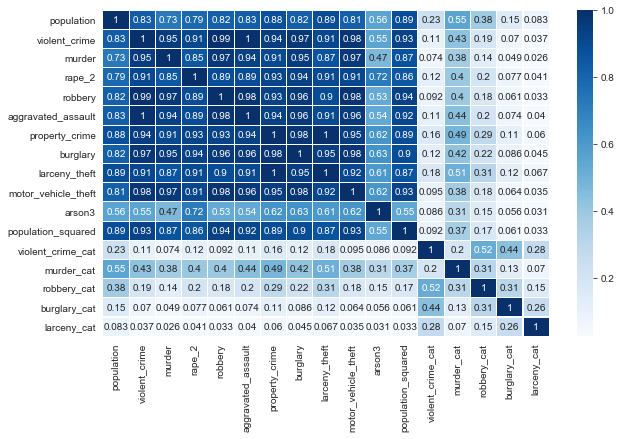

In [89]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_2014.corr(), linewidths=.1, cmap='Blues', annot=True)
plt.show()

### Regression

In [90]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_2014['property_crime'].values.reshape(-1, 1)
X = df_2014[['population_squared', 'murder_cat', 'robbery_cat']]
regr.fit(X, Y)

# Inspect the results.
print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared \n', regr.score(X, Y))

Coefficients 
 [[1.58299094e-07 4.33209547e+02 1.89919003e+02]]
Intercept 
 [23.44278367]
R-squared 
 0.8313667067032732


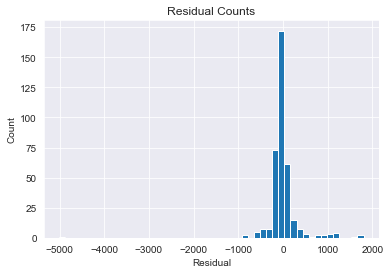

In [91]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df_2014['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual, bins=50)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

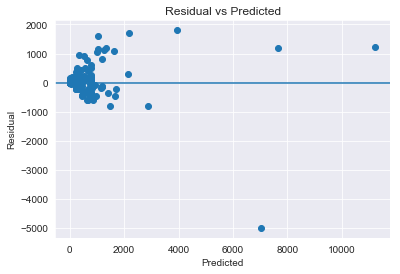

In [92]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs Predicted')
plt.show()

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


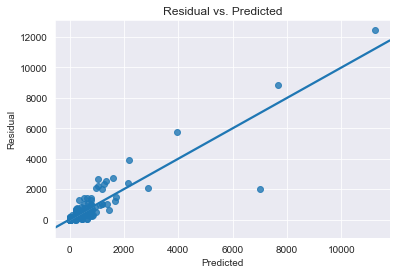

In [93]:
sns.regplot(predicted, actual, ci=False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs. Predicted')
plt.show()

In [94]:
correlation_matrix = X.corr()
display(correlation_matrix)

,population_squared,murder_cat,robbery_cat
population_squared,1.000,0.368,0.170
murder_cat,0.368,1.000,0.310
robbery_cat,0.170,0.310,1.000


In [95]:
# Model formula where '~' represents '=' in functional form.
linear_formula = 'property_crime ~ population_squared+murder_cat+robbery_cat'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df_2014).fit()

In [96]:
print('\ncoefficients: \n', lm.params)
print('\np-values: \n', lm.pvalues)
print('\nr-squared: \n', lm.rsquared)
print('\nConfidence Intervals: \n', lm.conf_int())
#print(lm.summary())


coefficients: 
 Intercept             23.443
population_squared     0.000
murder_cat           433.210
robbery_cat          189.919
dtype: float64

p-values: 
 Intercept            0.436
population_squared   0.000
murder_cat           0.000
robbery_cat          0.000
dtype: float64

r-squared: 
 0.8313667067032733

Confidence Intervals: 
                          0       1
Intercept          -35.620  82.506
population_squared   0.000   0.000
murder_cat         301.379 565.040
robbery_cat        104.516 275.322


# R-Squared 2013 vs 2014
R^2 2013: 0.82825882 <br>
R^2 2014: 0.83136671